# Example of using python to calculate dissolved oxygen along a river reach downstream of a pollutant discharge
Press shift-enter to "run" each cell.

# The Streeter-Phelps Equation / DO Sag Curve
$D = \frac{k_1 BOD_u}{k_2 - k_1} (\exp^{-k_1 t} - \exp^{-k_2 t}) + D_i \exp^{-k_2 t}$

Where:
$D$ is the saturation deficit (mg/l)  
$k_1$ is the deoxygenation rate (day-1)  
$k_2$ is the reaeration rate (day-1)    
$BOD_u$ is the initial oxygen demand of organic matter in the water, or ultimate BOD (mg/l)   
and $D_i$ is the initial oxygen deficit (mg/l)  



In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Qs = 0.4 #m3/s discharge in the stream
v = 0.5 #m/s velocity of the stream
T = 20 #ºC water temperature of the stream

Qe = 0.2 #m3/s
BODl = 25 #mg/l

k1 = 0.34 #day-1 deoxygenation
k2 = 0.65 #day-1 reaeration

Ss = 0.0035*T**2 - 0.337*T + 14.395 #Saturation concentration (function of temperature in ºC)
print('The saturation concentration (O2) is %0.2f mg/l' % Ss)
Oi = Qs / (Qs + Qe) * Ss
Di = Ss-Oi
print('The inicial oxygen concentration (Oi) is %0.2f mg/l' % Oi)
print('The initial saturation deficit (Di) is %0.2f mg/l' % Di)
BODu = Qe / (Qs + Qe) * BODl
print('BODu is %0.2f mg/l' % BODu)
BOD5i = BODu * (1-math.exp(-5*k1))
print('BOD5 is %0.2f mg/l' % BOD5i)


The saturation concentration (O2) is 9.05 mg/l
The inicial oxygen concentration (Oi) is 6.04 mg/l
The initial saturation deficit (Di) is 3.02 mg/l
BODu is 8.33 mg/l
BOD5 is 6.81 mg/l


# Define your Streeter-Phelps equation function below
Edit the function below to return D from the parameters k1, k2, Di, BODli and t.  
The exponential is: math.exp()

In [2]:
def streeterPhelps(k1, k2, Di, BODu, t):
    D =  D = k1*BODu/(k2-k1)*(math.exp(-k1*t)-math.exp(-k2*t))+Di*math.exp(-k2*t)
    return D

# Now test the results
:)

             oxygen deficit  dissolved oxygen
time [days]                                  
0.00000            3.018333          6.036667
0.10101            3.098774          5.956226
0.20202            3.164912          5.890088
0.30303            3.217966          5.837034
0.40404            3.259067          5.795933
...                     ...               ...
9.59596            0.337974          8.717026
9.69697            0.326920          8.728080
9.79798            0.316217          8.738783
9.89899            0.305854          8.749146
10.00000           0.295821          8.759179

[100 rows x 2 columns]


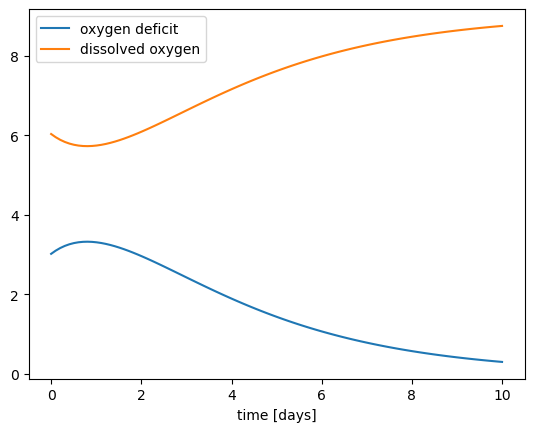

In [3]:
# Creates a dataframe to store the values...
time = np.linspace(0, 10, 100)
results = pd.DataFrame({'oxygen deficit': time*np.nan}, index=time)
results.index.name = 'time [days]'

# Applies your equation to all "times"
for t0 in results.index:
    results.loc[t0, 'oxygen deficit'] = streeterPhelps(k1, k2, Di, BODu, t0)

# Calculates the dissolved oxygen from the deficit
results['dissolved oxygen'] = Ss - results['oxygen deficit']

# Outputs time-based results (table and figure)
print(results)
ax = results.plot()


               oxygen deficit  dissolved oxygen
Distance [km]                                  
0.000000             3.018333          6.036667
4.363636             3.098774          5.956226
8.727273             3.164912          5.890088
13.090909            3.217966          5.837034
17.454545            3.259067          5.795933
...                       ...               ...
414.545455           0.337974          8.717026
418.909091           0.326920          8.728080
423.272727           0.316217          8.738783
427.636364           0.305854          8.749146
432.000000           0.295821          8.759179

[100 rows x 2 columns]


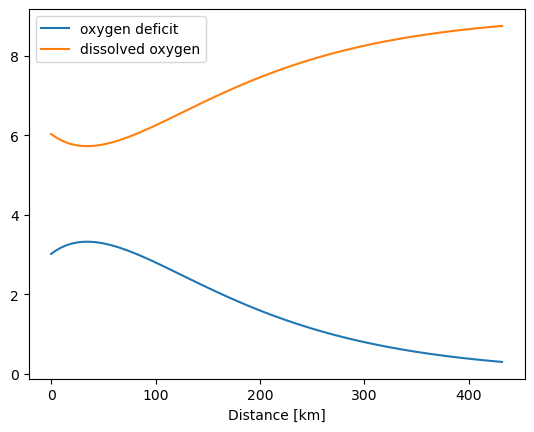

In [4]:
# Calculates distances too (based on time and water velocity)
results_distance = results.copy()
results_distance.index = results.index*v*86.400
results_distance.index.name = 'Distance [km]'

# Outputs distance-based results (table and figure)
results_distance.plot()
print(results_distance)

# Get the minimum dissolved oxygen concentration

In [5]:
minimum = results['dissolved oxygen'].min()
print('The minimum DO is %0.2f mg/l' % minimum)
where = results['dissolved oxygen'].argmin()
print('The minimum DO happens at %0.2f days or %0.2f km' % (results.index[where], results_distance.index[where]))


The minimum DO is 5.73 mg/l
The minimum DO happens at 0.81 days or 34.91 km


# An optimization problem:
What is the maximum discharge so that the dissolved oxygen never drops below 50% of the saturation rate?  
Use scipy's "minimize scalar"    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar

Check the last example in the webpage...   
Use the method='bounded' and bounds=(20, 800)

In [ ]:
# First, define the function to be minimized
def minimumO(BOD):
    '''
    This is a function that will be run many times
    '''
    
    time = np.linspace(0, 10, 100)
    tmp = pd.DataFrame({'oxygen deficit': time*np.nan}, index=time)

    BODl = Qe / (Qs + Qe) * BOD
    
    # Applies your equation to all "times"
    for t0 in tmp.index:
        tmp.loc[t0, 'oxygen deficit'] = streeterPhelps(k1, k2, Di, BODl, t0)
    
    # The minumum oxygen concentration is equivalent to the maximum defict:
    O = (Ss - tmp.loc[:, 'oxygen deficit'])
    minO = O.min()

    return minO


# Second, define the function we want to minimize (the distance to 50% staturation)
def toMinimize(BOD):
    
    distanceSquared = (minimumO(BOD)-(0.5*9.05))**2
    
    return distanceSquared


# Run the mimize_scalar funtion
from scipy.optimize import minimize_scalar
res = #YOUR CODE HERE#

print('The critical BOD concentration appears to be %0.2f mg/l' % res.x)

# Test your results

In [ ]:
#Limit BOD
limitBOD = res.x*1
BODl = Qe / (Qs + Qe) * limitBOD

time = np.linspace(0, 10, 100)
results = pd.DataFrame({'oxygen deficit': time*np.nan}, index=time)
results.index.name = 'time [days]'

# Applies your equation to all "times"
for t0 in results.index:
    results.loc[t0, 'oxygen deficit'] = streeterPhelps(k1, k2, Di, BODl, t0)

# Calculates the dissolved oxygen from the deficit
results['dissolved oxygen'] = Ss - results['oxygen deficit']

# Outputs time-based results (table and figure)
print(results)
ax = results.plot()